##**Importing Necessary Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from typing import List
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler
import imblearn
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

## **Importing Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
risk_factor_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oishee apu/data.csv")
risk_factor_df.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0


## **Dataset Description**

In [4]:
risk_factor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

## **Data Pre-Processing**



> Encoding 'string' columns to 'numeric'



In [5]:
cols_to_convert = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes',
                   'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
                   'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',
                   'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                   'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                   'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
                   'STDs:HPV', 'STDs: Time since first diagnosis',
                   'STDs: Time since last diagnosis']

risk_factor_df[cols_to_convert] = risk_factor_df[cols_to_convert].apply(pd.to_numeric, errors="coerce")
risk_factor_df[cols_to_convert].fillna(np.nan, inplace=True)
imp = SimpleImputer(strategy="median")
X = imp.fit_transform(risk_factor_df)
risk_factor_df = pd.DataFrame(X, columns=list(risk_factor_df.columns))
risk_factor_df["Age"] = risk_factor_df["Age"].astype(int)

In [6]:
std_cols = {'STDs:condylomatosis',
            'STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis',
            'STDs:vulvo-perineal condylomatosis',
            'STDs:syphilis',
            'STDs:pelvic inflammatory disease',
            'STDs:genital herpes',
            'STDs:molluscum contagiosum',
            'STDs:AIDS',
            'STDs:HIV',
            'STDs:Hepatitis B',
            'STDs:HPV'}

risk_factor_df["total_std"] = risk_factor_df[list(std_cols)].sum(axis=1)

In [7]:
test_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
risk_factor_df["total_tests"] = risk_factor_df[test_cols].sum(axis = 1)

In [8]:
to_int_and_beyond = {"total_tests",
                     "total_std",
                     "Smokes",
                     "Biopsy",
                     "Dx:Cancer",
                     "Num of pregnancies",
                     "Number of sexual partners",
                     "First sexual intercourse",
                     "Hormonal Contraceptives",
                     "IUD",
                     "STDs",
                     "STDs (number)",
                     "STDs: Number of diagnosis",
                     "Dx:CIN",
                     "Dx:HPV",
                     "Dx",
                     "Hinselmann",
                     "Schiller",
                     "Biopsy",
                     "Citology"}

to_int_and_beyond = to_int_and_beyond.union(std_cols)

for col in to_int_and_beyond:
    risk_factor_df[col] = risk_factor_df[col].astype(int)

In [9]:
risk_factor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    int64  
 2   First sexual intercourse            858 non-null    int64  
 3   Num of pregnancies                  858 non-null    int64  
 4   Smokes                              858 non-null    int64  
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    int64  
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    int64  
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

## **Oversampling - ADASYN**

Text(0.5, 1.0, 'Prediction Count')

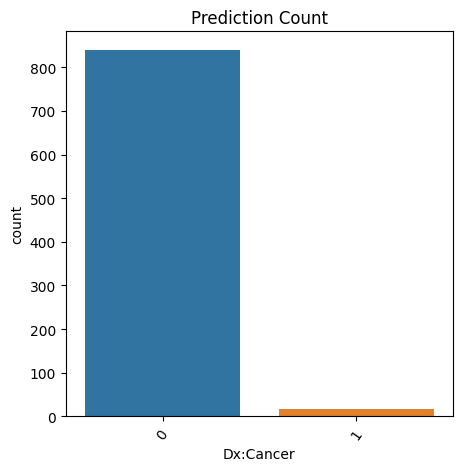

In [10]:
plt.figure(figsize=(5,5))
plot=sns.countplot(x='Dx:Cancer', data = risk_factor_df)
plot.set_xticklabels(plot.get_xticklabels(), fontsize=10)
plot.set_xticklabels(plot.get_xticklabels(), rotation=55)
plt.title("Prediction Count")

In [11]:
X = risk_factor_df.drop(["Dx:Cancer"], axis=1)
y = risk_factor_df["Dx:Cancer"].copy()

In [12]:
adasyn = ADASYN(random_state=42)
x_adasyn,y_adasyn = adasyn.fit_resample(X,y)
risk_factor_df = x_adasyn.join(y_adasyn)

Text(0.5, 1.0, 'Prediction Count')

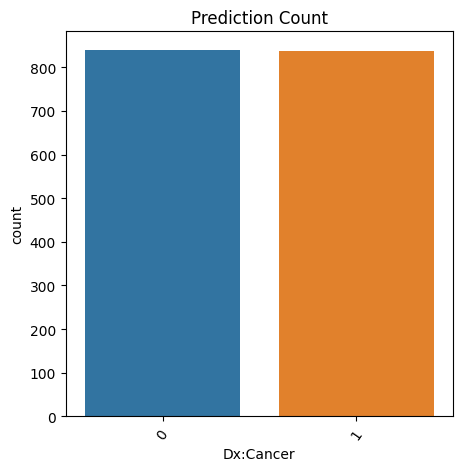

In [13]:
plt.figure(figsize=(5,5))
plot=sns.countplot(x='Dx:Cancer', data = risk_factor_df)
plot.set_xticklabels(plot.get_xticklabels(), fontsize=10)
plot.set_xticklabels(plot.get_xticklabels(), rotation=55)
plt.title("Prediction Count")

## **Splitting Features and Target Variable**

In [14]:
from sklearn import preprocessing
X = risk_factor_df.drop('Dx:Cancer',axis=1).values
y = risk_factor_df['Dx:Cancer'].values

## **Principal Component Analysis (PCA)**

In [15]:
import plotly.express as px
pca = PCA()
pca.fit(risk_factor_df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Number of features before PCA: ", X_train.shape)
pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("pca", PCA(n_components=11))
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
print("Number of features after PCA: ", X_train.shape)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Number of features before PCA:  (1341, 37)
Number of features after PCA:  (1341, 11)


## **1. Logistic Regression**



> GridSearch



In [16]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2'] # L2
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.998629 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.998629 (0.001601) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.997793 (0.002135) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.998509 (0.001713) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.998152 (0.002299) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.997854 (0.002311) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.997913 (0.002547) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.995708 (0.003868) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.996066 (0.003644) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.996304 (0.003452) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.988732 (0.006252) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.988731 (0.006140) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.988969 (0.005404) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.960230 (0.011694) wit



> Classification Report



In [17]:
LR = LogisticRegression(C=100, penalty='l2', solver='newton-cg').fit(X_train, y_train)
y_predict = LR.predict(X_test)
print(classification_report(y_test, y_predict, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9886    0.9943       175
           1     0.9877    1.0000    0.9938       161

    accuracy                         0.9940       336
   macro avg     0.9939    0.9943    0.9940       336
weighted avg     0.9941    0.9940    0.9940       336





> Confusion Matrix



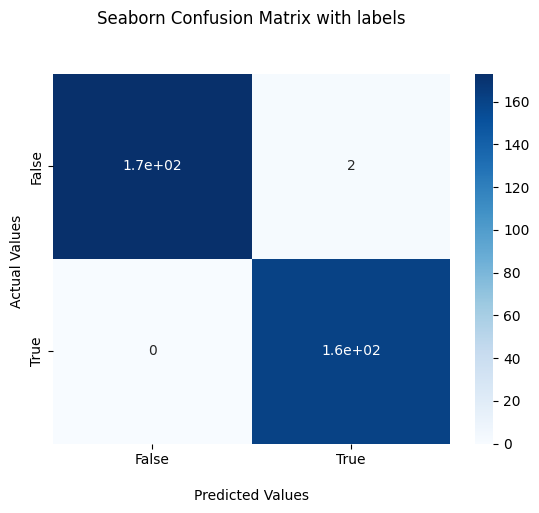

In [18]:
cf_matrix = confusion_matrix(y_test, y_predict)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()



> ROC-AUC Curve



No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


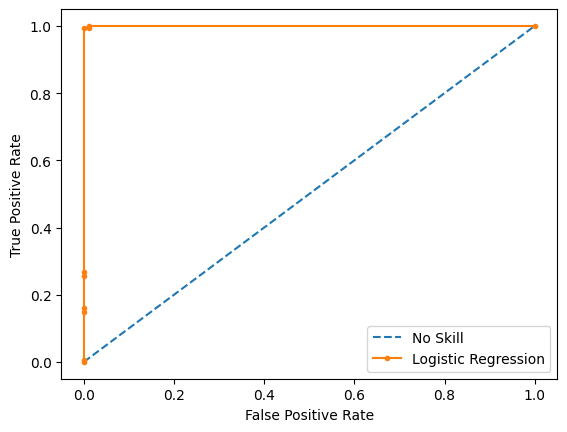

In [19]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = LR.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
# calculating scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarizing scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculating roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plotting roc curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## **2. Naive Bayes**



> Classification Report



In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_predict = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       175
           1       0.90      0.83      0.86       161

    accuracy                           0.88       336
   macro avg       0.88      0.87      0.87       336
weighted avg       0.88      0.88      0.87       336





> Confusion Matrix



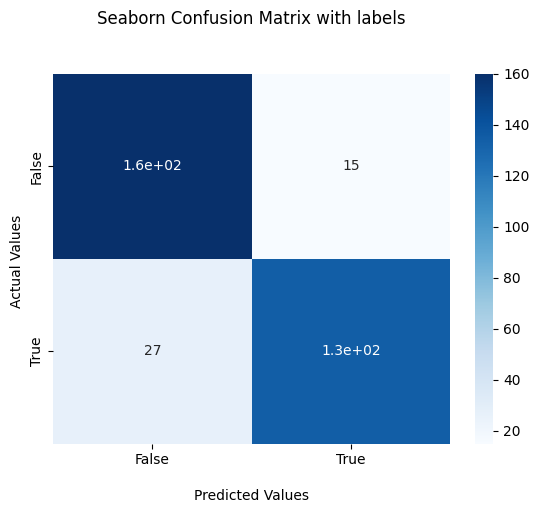

In [21]:
cf_matrix = confusion_matrix(y_test, y_predict)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()



> ROC-AUC Curve



No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.894


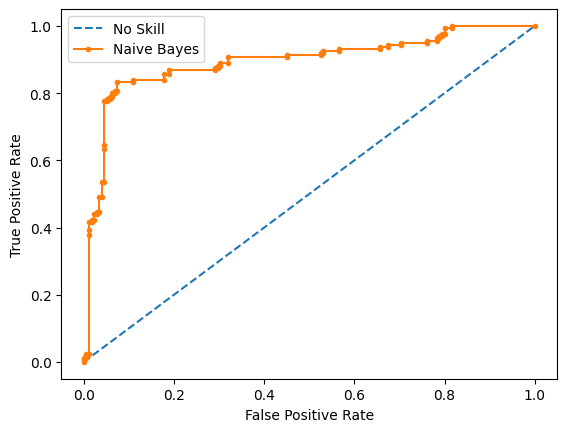

In [22]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = gnb.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
# calculating scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarizing scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (lr_auc))
# calculating roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plotting roc curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## **3. Random Forest**



> GridSearch



In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
n_estimators = [10, 100, 120, 130]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=5, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.998808 using {'max_features': 'log2', 'n_estimators': 120}
0.998270 (0.001895) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.998391 (0.001707) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.998450 (0.001999) with: {'max_features': 'sqrt', 'n_estimators': 120}
0.998390 (0.001809) with: {'max_features': 'sqrt', 'n_estimators': 130}
0.997913 (0.002249) with: {'max_features': 'log2', 'n_estimators': 10}
0.998807 (0.001578) with: {'max_features': 'log2', 'n_estimators': 100}
0.998808 (0.001577) with: {'max_features': 'log2', 'n_estimators': 120}
0.998629 (0.001600) with: {'max_features': 'log2', 'n_estimators': 130}




> Classification Report



In [24]:
RF = RandomForestClassifier(max_features='sqrt', n_estimators=100).fit(X_train, y_train)
y_predict = RF.predict(X_test)
print(classification_report(y_test, y_predict, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9886    0.9943       175
           1     0.9877    1.0000    0.9938       161

    accuracy                         0.9940       336
   macro avg     0.9939    0.9943    0.9940       336
weighted avg     0.9941    0.9940    0.9940       336





> Confusion Matrix



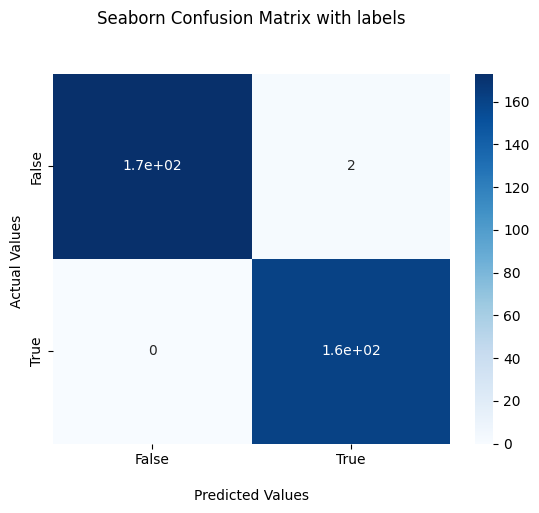

In [25]:
cf_matrix = confusion_matrix(y_test, y_predict)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()



> ROC-AUC Curve



No Skill: ROC AUC=0.500
Random Forest: ROC AUC=1.000


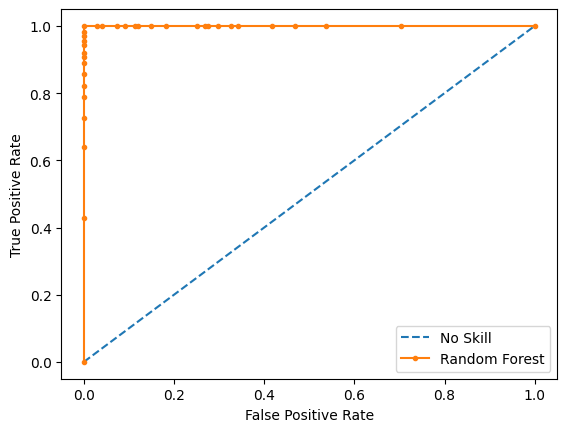

In [26]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = RF.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
# calculating scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarizing scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculating roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plotting roc curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## **4. Fusion Classifier**

In [27]:
# Create the individual classifiers
rf_classifier = RandomForestClassifier(max_features='sqrt', n_estimators=100)
lr_classifier = LogisticRegression(C=100, penalty='l2', solver='newton-cg')

# Create a VotingClassifier with the three classifiers
voting_classifier = VotingClassifier(estimators=[
    ('Random Forest', rf_classifier),
    ('Logistic Regression', lr_classifier)
], voting='hard')  # 'hard' for majority voting

# Fit the ensemble model on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_predict = voting_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_predict, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       175
           1     1.0000    1.0000    1.0000       161

    accuracy                         1.0000       336
   macro avg     1.0000    1.0000    1.0000       336
weighted avg     1.0000    1.0000    1.0000       336



**Save model and pkl file**

In [28]:
import joblib
joblib.dump(voting_classifier, '/content/drive/MyDrive/Colab Notebooks/Oishee apu/voting_classifier.model')
joblib.dump(voting_classifier, '/content/drive/MyDrive/Colab Notebooks/Oishee apu/voting_classifier_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/Oishee apu/voting_classifier_model.pkl']

**Confusion matrix**

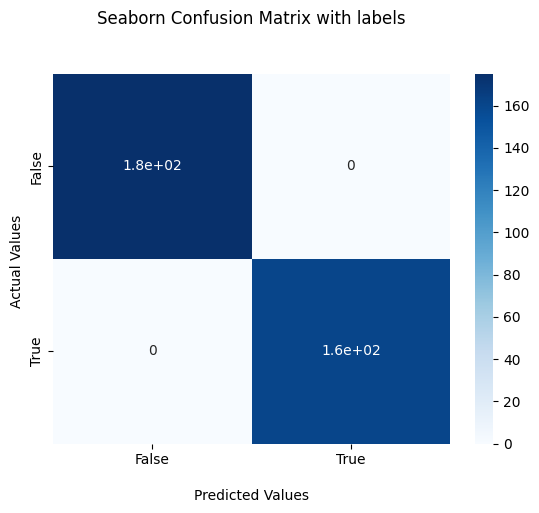

In [29]:
cf_matrix = confusion_matrix(y_test, y_predict)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

**AUC/ROC**

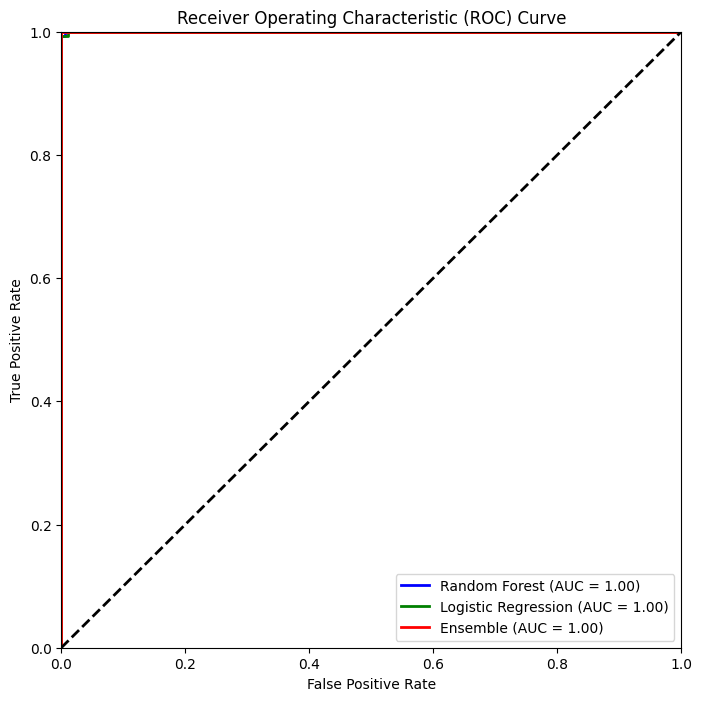

In [37]:
# Get class probabilities for each classifier in the ensemble
y_probs_rf = voting_classifier.named_estimators_['Random Forest'].predict_proba(X_test)[:, 1]
y_probs_lr = voting_classifier.named_estimators_['Logistic Regression'].predict_proba(X_test)[:, 1]

# Average the probabilities for ensemble prediction
y_probs_ensemble = (y_probs_rf + y_probs_lr) / 2

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve for Ensemble
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_probs_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_ensemble, tpr_ensemble, color='red', lw=2, label='Ensemble (AUC = {:.2f})'.format(roc_auc_ensemble))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


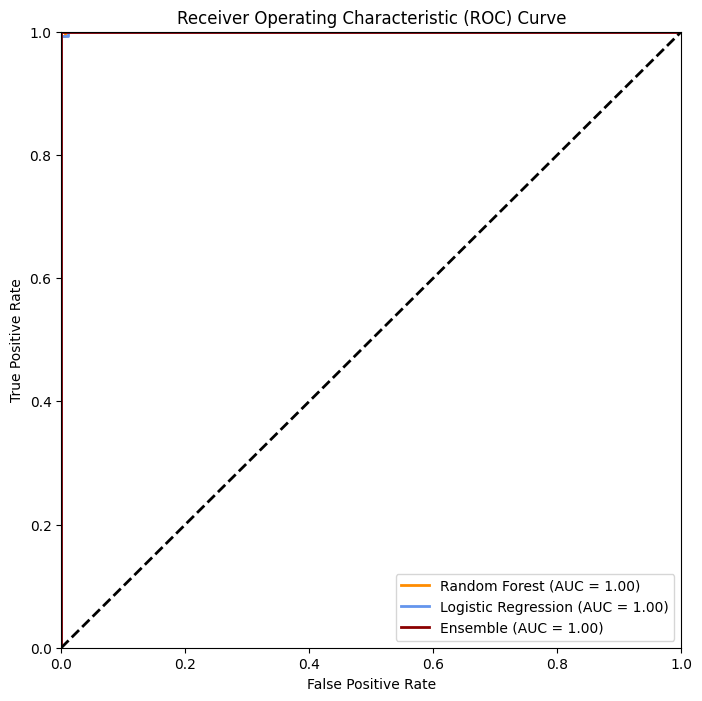

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Get class probabilities for each classifier in the ensemble
y_probs_rf = voting_classifier.named_estimators_['Random Forest'].predict_proba(X_test)[:, 1]
y_probs_lr = voting_classifier.named_estimators_['Logistic Regression'].predict_proba(X_test)[:, 1]

# Average the probabilities for ensemble prediction
y_probs_ensemble = (y_probs_rf + y_probs_lr) / 2

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve for Ensemble
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_probs_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plot ROC curves with similar style
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_lr, tpr_lr, color='cornflowerblue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_ensemble, tpr_ensemble, color='darkred', lw=2, label='Ensemble (AUC = {:.2f})'.format(roc_auc_ensemble))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()